In [14]:
# Import required liabraries
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

C:\Users\gaura\AppData\Local\Temp\ipykernel_17004\3907321368.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


In [16]:
print("Train Dataset")
train_df

Train Dataset


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [17]:
print("Test Dataset")
test_df

Test Dataset


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


## Task 1
#### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [20]:
# Count promotions in the train Dataset
train_promo_counts = train_df['Promo'].value_counts()

# Count promotions in the test Dataset
test_promo_counts = test_df['Promo'].value_counts()

print("Train Dataset Promotion Distribution:")
print(train_promo_counts)

print("\nTest Dataset Promotion Distribution:")
print(test_promo_counts)

Train Dataset Promotion Distribution:
Promo
0    629129
1    388080
Name: count, dtype: int64

Test Dataset Promotion Distribution:
Promo
0    24824
1    16264
Name: count, dtype: int64


In [21]:
# Calculate percentage of promotions in the train set
total_train_promo = len(train_df)
train_promo_percentage = train_promo_counts / total_train_promo

# Calculate percentage of promotions in the test set
total_test_promo = len(test_df)
test_promo_percentage = test_promo_counts / total_test_promo


print("Train Dataset Promotion Distribution (Percentage):")
print(train_promo_percentage)

print("\nTest Dataset Promotion Distribution (Percentage):")
print(test_promo_percentage)

Train Dataset Promotion Distribution (Percentage):
Promo
0    0.618485
1    0.381515
Name: count, dtype: float64

Test Dataset Promotion Distribution (Percentage):
Promo
0    0.604167
1    0.395833
Name: count, dtype: float64


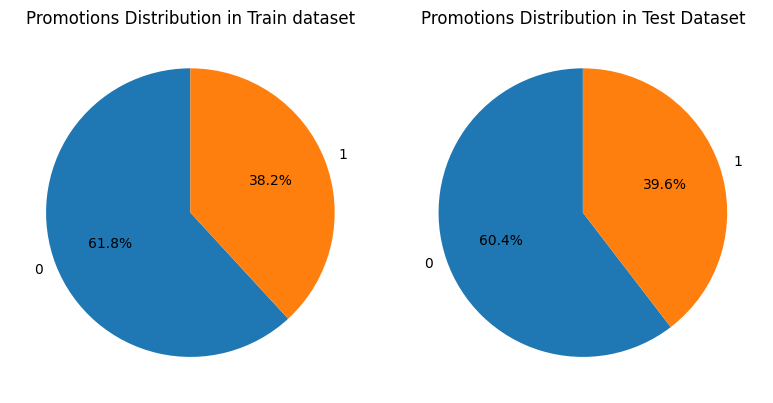

In [22]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot promotions distribution in the training set
axes[0].pie(train_promo_counts, labels=train_promo_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Promotions Distribution in Train dataset')

# Plot promotions distribution in the test set
axes[1].pie(test_promo_counts, labels=test_promo_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Promotions Distribution in Test Dataset')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**The promotions distributed similarly between these two groups.**

#### Check & compare sales behavior before, during and after holidays

In [23]:
# StateHolidays in the train Dataset
StateHoliday_counts = train_df['StateHoliday'].value_counts()

# SchoolHoliday in the train Dataset
SchoolHoliday_counts = train_df['SchoolHoliday'].value_counts()

print("StateHolidays in the train Dataset:")
print(StateHoliday_counts)

print("\nSchoolHoliday in the train Dataset:")
print(SchoolHoliday_counts)

StateHolidays in the train Dataset:
StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

SchoolHoliday in the train Dataset:
SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64


In [24]:
# Convert 'Date' column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Identify holidays and the day before and after each holiday
holiday_dates = train_df[train_df['StateHoliday'].isin(['a', 'b', 'c'])]['Date']
previous_day_holidays = holiday_dates - pd.Timedelta(days=1)
next_day_holidays = holiday_dates + pd.Timedelta(days=1)

# Filter rows for the day before and after holiday
previous_day_sales = train_df[train_df['Date'].isin(previous_day_holidays) & ~train_df['Date'].isin(holiday_dates)]['Sales']
next_day_sales = train_df[train_df['Date'].isin(next_day_holidays) & ~train_df['Date'].isin(holiday_dates)]['Sales']

# Calculate average sale for the day before and after holiday
avg_sale_before_holiday = previous_day_sales.mean()
avg_sale_after_holiday = next_day_sales.mean()

# Filter rows for holidays
holiday_sales = train_df[train_df['Date'].isin(holiday_dates)]['Sales']
# Calculate average sale during holidays
avg_sale_during_holidays = holiday_sales.mean()

print("Average Sale Before Holiday:", avg_sale_before_holiday)
print("Average Sale During Holidays:", avg_sale_during_holidays)
print("Average Sale After Holiday:", avg_sale_after_holiday)

Average Sale Before Holiday: 5916.391316848763
Average Sale During Holidays: 1768.6530591925125
Average Sale After Holiday: 7438.113818433819


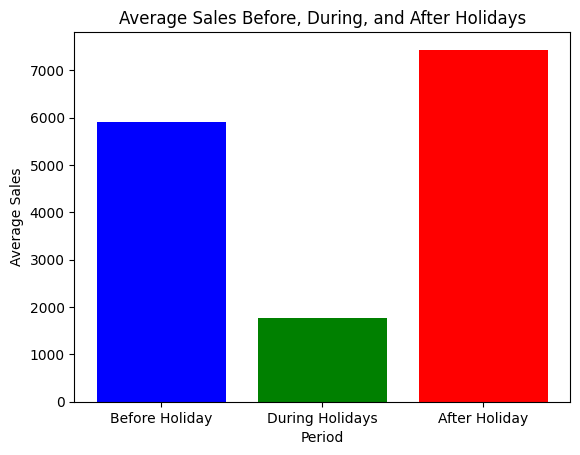

In [25]:
# Plotting
labels = ['Before Holiday', 'During Holidays', 'After Holiday']
avg_sales = [avg_sale_before_holiday, avg_sale_during_holidays, avg_sale_after_holiday]

plt.bar(labels, avg_sales, color=['blue', 'green', 'red'])
plt.title('Average Sales Before, During, and After Holidays')
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.show()

**Sales during holidays tend to dip compared to periods before and after holidays. Additionally, post-holiday sales exhibit a noticeable increase in comparison to pre-holiday sales.**

#### Find out any seasonal (Christmas, Easter etc) purchase behaviours.

**a = public holiday, b = Easter holiday, c = Christmas, 0 = None**

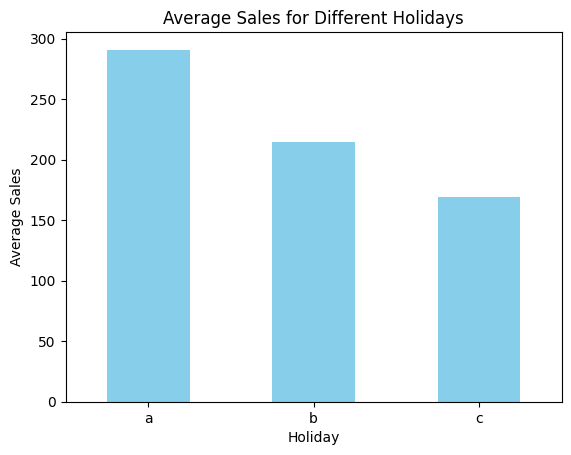

In [26]:
# Filter out 'None' category
filtered_train_df = train_df[train_df['StateHoliday'] != '0']

# Calculate average sale for each holiday
avg_sales_per_holiday = filtered_train_df[filtered_train_df['Date'].isin(holiday_dates)].groupby('StateHoliday')['Sales'].mean()

# Plotting
avg_sales_per_holiday.plot(kind='bar', color='skyblue')
plt.title('Average Sales for Different Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

**The highest sales occur during public holidays (a), surpassing those during Easter holidays (b) and Christmas (c). Furthermore, Easter holiday sales are comparatively lower than those during other holidays.**